# Subplots

In [2]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

plt.subplot?

<ipython-input-63-29c9f86ac4b3>:15: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(1,2,1)


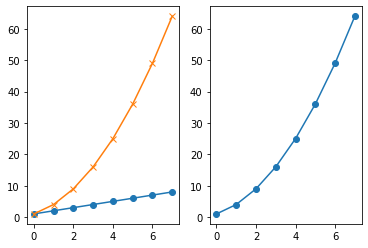

In [63]:
plt.figure()

# Here i reveal the structure of my figure which is `1ROW` & `2columns`
# i'm going to plot the `1` left hand side one.
plt.subplot(1,2,1)
linear_data = np.array([1,2,3,4,5,6,7,8])
plt.plot(linear_data,'-o')

# i'm going to plot the `2` right hand side one.
plt.subplot(1,2,2)
exponential_data = linear_data**2
plt.plot(exponential_data,'-o')

# we can put the exponential line in left graph too, to make both of them
# in the same graph.
plt.subplot(1,2,1)
plt.plot(exponential_data,'-x');

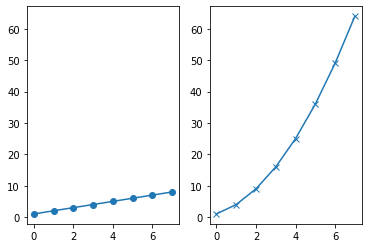

In [64]:
# This would be a big problem with misleading the reader 
# if we couldn't find a way to lock the axis between subplots.

plt.figure()
ax1 = plt.subplot(1,2,1)
plt.plot(linear_data, '-o')

# Here we're gonna say explictly that we wanna share
# the y-axis of the 1st plot.
ax2 = plt.subplot(1,2,2, sharey = ax1)
plt.plot(exponential_data, '-x');

<ipython-input-65-69615af0f6ba>:2: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(1,2,1) == plt.subplot(121)


True

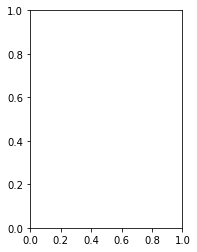

In [65]:
# we can give the arguments of the subplot() in a slightly different way.
plt.subplot(1,2,1) == plt.subplot(121)

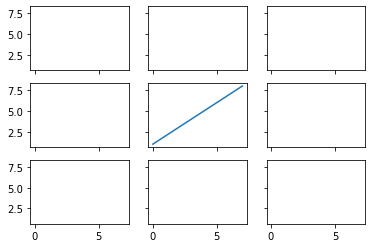

In [66]:
# we can create a multiple number of graphs ,then assign the data to plot.
# we know taht it has a little bit goofy syntax.        
fig , ((ax1,ax2,ax3),(ax4,ax5,ax6),(ax7,ax8,ax9)) = plt.subplots(3,3,
                                                                sharex=True,
                                                                sharey=True)
ax5.plot(linear_data);

# set inside tick labels to visible
for ax in plt.gcf().get_axes():
    for label in ax.get_xticklabels() + ax.get_yticklabels():
        label.set_visible(True)
# necessary on some systems to update the plot
plt.gcf().canvas.draw()
# what was supposed from these lines to do is to display the labels 
# in every sigle plot, but it didn't work & i don't know why?.

# Histograms

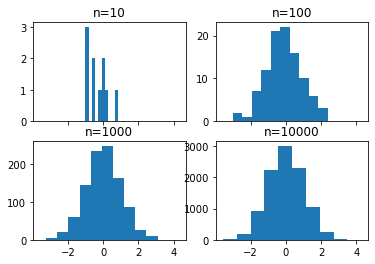

In [67]:
# by defualt the num of bins here are `10 for every bin in x-axis`.
fig , ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2,sharex = True)
axs = [ax1,ax2,ax3,ax4]

for n in range(0,len(axs)):
    sample_size = 10**(n+1)
    sample = np.random.normal(size = sample_size)
    axs[n].hist(sample)
    axs[n].set_title('n={}'.format(sample_size))

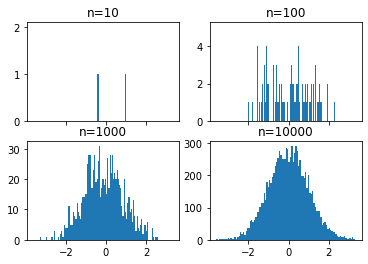

In [68]:
# Let's increase the bins to be 100.
fig , ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2,sharex = True)
axs = [ax1,ax2,ax3,ax4]

for n in range(0,len(axs)):
    sample_size = 10**(n+1)
    sample = np.random.normal(size = sample_size)
    axs[n].hist(sample, bins = 100)
    axs[n].set_title('n={}'.format(sample_size))

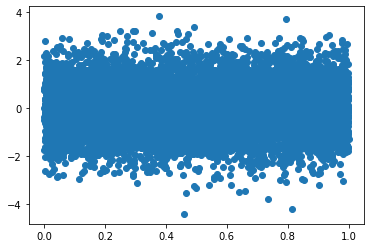

In [69]:
plt.figure()
y = np.random.normal(size = 10000)
x = np.random.random(size = 10000)
plt.scatter(x,y);

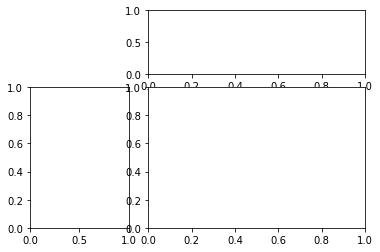

In [70]:
# use gridspec to partition the figure into subplots
import matplotlib.gridspec as gridspec

plt.figure()
gspec = gridspec.GridSpec(3,3)

top_hist= plt.subplot(gspec[0,1:])
side_hist =  plt.subplot(gspec[1:,0])
lower_right = plt.subplot(gspec[1:,1:])

<IPython.core.display.Javascript object>


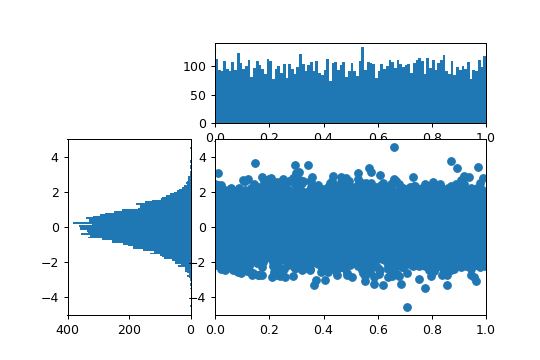

In [71]:
# use gridspec to partition the figure into subplots
%matplotlib notebook
import matplotlib.gridspec as gridspec

plt.figure()
gspec = gridspec.GridSpec(3,3)

top_hist= plt.subplot(gspec[0,1:])
side_hist =  plt.subplot(gspec[1:,0])
lower_right = plt.subplot(gspec[1:,1:])

# fill each plot
y = np.random.normal(size = 10000)
x = np.random.random(size = 10000)
lower_right.scatter(x,y)
top_hist.hist(x, bins=100)
side_hist.hist(y,bins=100,orientation = 'horizontal');

In [72]:
# clear the histograms and plot normed histograms
top_hist.clear()
top_hist.hist(x, bins=100)
side_hist.clear()
side_hist.hist(y, bins=100, orientation='horizontal')
# flip the side histogram's x axis
side_hist.invert_xaxis()

In [73]:
# change axes limits
for ax in [top_hist,lower_right]:
    ax.set_xlim(0,1)
for ax in [side_hist,lower_right]:
    ax.set_ylim(-5,5)

**look at the moocData in the same directory.**


# Box and Whisker Plots.

In [74]:
import pandas as pd
import numpy as np

normal_sample = np.random.normal(loc= 0.0 , scale = 1.0 , size = 10000)
random_sample = np.random.random(size = 10000)
gamma_sample = np.random.gamma(2, size = 10000)

# lets put them in dataframe
df = pd.DataFrame({'normal' : normal_sample,
                   'random': random_sample,
                   'gamma': gamma_sample})
df

,normal,random,gamma
0,-1.022935,0.695961,2.238698
1,0.143251,0.147429,1.814062
2,-0.934399,0.427948,0.446336
3,0.926371,0.344653,1.210101
4,0.503287,0.559403,2.833428
...,...,...,...
9995,-0.703622,0.998214,0.959947
9996,0.000959,0.076280,3.355059
9997,-0.626360,0.850599,2.779783
9998,0.167207,0.118824,0.890101


In [75]:
df.describe()

,normal,random,gamma
count,10000.000000,10000.000000,10000.000000
mean,-0.004550,0.503848,2.003040
std,0.999637,0.288201,1.401440
min,-4.442079,0.000020,0.004660
25%,-0.675012,0.252067,0.966676
50%,-0.010533,0.510501,1.690850
75%,0.658813,0.753188,2.704057
max,4.320074,0.999585,12.972231


<ipython-input-76-7e9e04b0307a>:4: MatplotlibDeprecationWarning: Setting whis to 'range' is deprecated since 3.2 and support for it will be removed two minor releases later; set it to [0, 100] to achieve the same effect.
  norm_box =plt.boxplot(df['normal'],whis ='range') # whis =[0, 100]


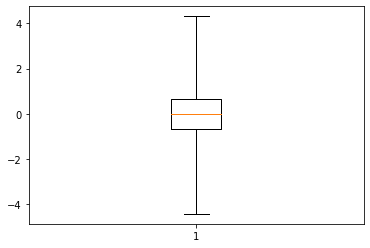

In [76]:
%matplotlib inline

plt.figure()
norm_box =plt.boxplot(df['normal'],whis ='range') # whis =[0, 100]

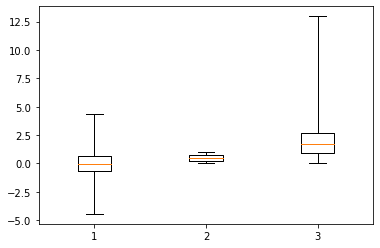

In [77]:
plt.clf()
all_boxes = plt.boxplot([df['normal'],df['random'],df['gamma']],whis =[0, 100]) # whis =[0, 100]

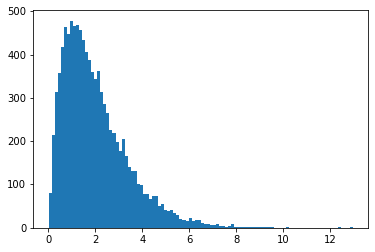

In [78]:
plt.figure()
gamma_hist = plt.hist(df['gamma'], bins = 100)

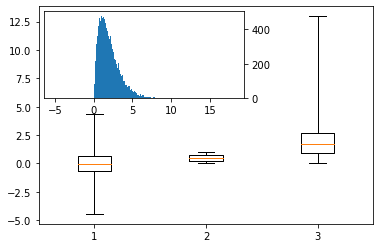

In [79]:
# what if we want the two plots into one figure.
import mpl_toolkits.axes_grid1.inset_locator as mpl_il
plt.figure()
plt.boxplot([df['normal'],df['random'],df['gamma']],whis =[0, 100])
ax2 = mpl_il.inset_axes(plt.gca() , width='60%' , height= '40%' , loc=2)
ax2.hist(df['gamma'],bins=100)
ax2.yaxis.tick_right() 
ax2.margins(x=0.5)

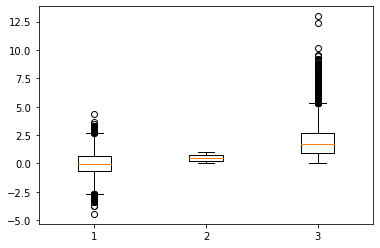

In [80]:
# what if we didn't pass the `whis = 'range'`
all_boxes = plt.boxplot([df['normal'],df['random'],df['gamma']])

# Heatmaps

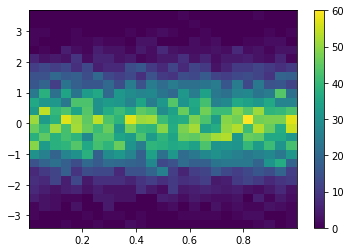

In [81]:
plt.figure()
y = np.random.normal(loc = 0.0 , scale= 1.0 ,size = 10000)
x = np.random.random(size = 10000)
_=plt.hist2d(x,y,bins=25)
plt.colorbar();

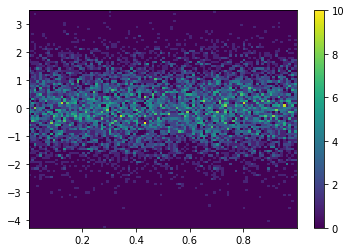

In [82]:
# As you increase the bins every data point starts to fall in its 
# own category , where each one of them is unique.
plt.figure()
y = np.random.normal(loc = 0.0 , scale= 1.0 ,size = 10000)
x = np.random.random(size = 10000)
_=plt.hist2d(x,y,bins=100)
plt.colorbar();

# Animation

In [83]:
import matplotlib.animation as animation
# we'll show the histogram was built from `1`sample to `100`sample.
n = 100
x = np.random.randn(n) 
x[:12]

array([ 1.74138898e+00, -2.01003224e+00,  2.15242640e-01, -4.60571523e-01,
        9.30266288e-01,  3.36025658e-01, -5.20286779e-01,  2.28297957e+00,
       -2.13755050e+00, -6.04144037e-01, -3.57841270e-01,  1.08351440e-03])

In [84]:
# count is the counter of the numbers in the list above 1:100.
# a : stands for animation.
%matplotlib notebook

def update(count): 
    if count == n:
        a.event_source.stop()
    plt.cla()
    bins = np.arange(-4 , 4 , 0.5)
    plt.hist(x[:count] , bins = bins)
    plt.axis([-4,4,0,30]) # set the limits from 'X' & 'Y' AXIS.
    
    plt.gca().set_title('sampling the normal distribution')
    plt.gca().set_ylabel('Frequency')
    plt.gca().set_xlabel('value')
    
    plt.annotate('n = {}'.format(count),[3,27])

<IPython.core.display.Javascript object>


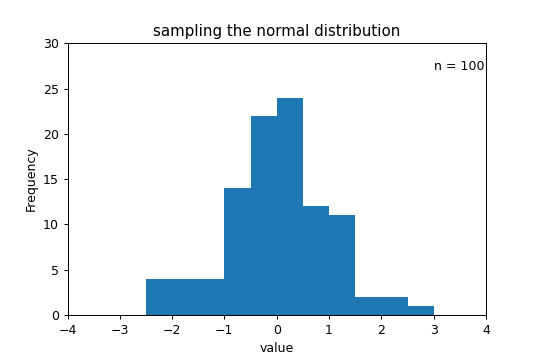

In [85]:
fig = plt.figure()
a = animation.FuncAnimation(fig , update , interval = 100)

# Interactivity

In [5]:
data = np.random.rand(10)
data

array([0.86770111, 0.80733788, 0.98498516, 0.31567127, 0.25442492,
       0.87600621, 0.32346638, 0.01708895, 0.1566772 , 0.83099733])

<IPython.core.display.Javascript object>


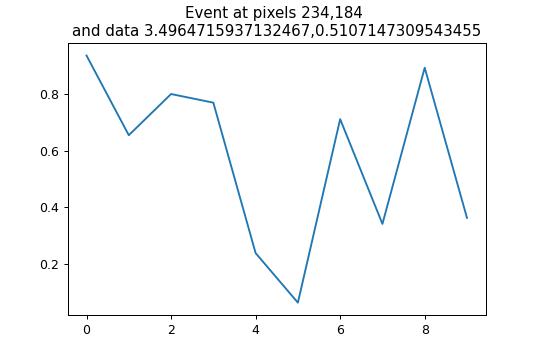

7

In [7]:
%matplotlib notebook

plt.figure()
data = np.random.rand(10)
plt.plot (data)

def oneclick(event):
    plt.cla()
    plt.plot (data)
    plt.gca().set_title('Event at pixels {},{} \nand data {},{}'.format(event.x, event.y, event.xdata, event.ydata))

plt.gcf().canvas.mpl_connect('button_press_event' ,oneclick)

# the data'll show in the titles once you click on a pixel in the plot.

In [89]:
from random import shuffle
origins = ['China', 'Brazil', 'India', 'USA', 'Canada', 'UK',
           'Germany', 'Iraq', 'Chile', 'Mexico']
shuffle(origins)

df = pd.DataFrame({'height' : np.random.rand(10),
                   'weight' : np.random.rand(10),
                   'origin' : origins})
df

,height,weight,origin
0,0.819826,0.911084,UK
1,0.637062,0.953128,India
2,0.418259,0.188781,Germany
3,0.449012,0.567200,Mexico
4,0.725521,0.363220,Iraq
5,0.707936,0.955299,China
6,0.538680,0.246358,Chile
7,0.552956,0.901193,Brazil
8,0.502198,0.655499,Canada
9,0.428636,0.408805,USA


<IPython.core.display.Javascript object>


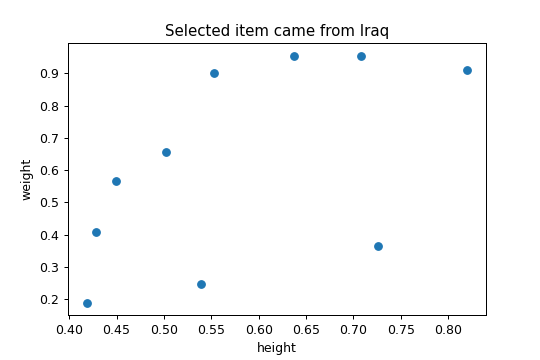

Text(0.5, 0, 'height')

In [102]:
plt.figure()
# picker=5 means the mouse doesn't have to click directly on an event,
# but can be up to 5 pixels away,and it can  find the closest object.
plt.scatter(df['height'] , df['weight'] , picker=5)
plt.gca().set_ylabel('weight')
plt.gca().set_xlabel('height')

In [103]:
def onpick(event):
    origin = df.iloc[event.ind[0]]['origin']
    plt.gca().set_title('Selected item came from {}'.format(origin))

# tell mpl_connect we want to pass a 'pick_event' into onpick when the event is detected
plt.gcf().canvas.mpl_connect('pick_event', onpick)

7